In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [3]:
data=pd.read_csv('ml_case_training_data.csv')
data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
data.shape

(16096, 32)

In [5]:
train_output=pd.read_csv('ml_case_training_output.csv')
train_output.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [6]:
train_output.shape

(16096, 2)

In [7]:
train=pd.merge(data,train_output,how='inner',on='id').copy(deep=True)

In [8]:
history_train=pd.read_csv('ml_case_training_hist_data.csv')
history_train.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [9]:
history_train.shape

(193002, 8)

In [10]:
history_train.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign_disc_ele,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cons_12m,16096.0,194804.384630,679515.083441,-125276.000000,5906.250000,15332.500000,50221.500000,1.609711e+07
cons_gas_12m,16096.0,31911.636742,177588.456233,-3037.000000,0.000000,0.000000,0.000000,4.188440e+06
cons_last_month,16096.0,19461.536158,82356.756560,-91386.000000,0.000000,901.000000,4127.000000,4.538720e+06
forecast_base_bill_ele,3508.0,335.843857,649.406000,-364.940000,0.000000,162.955000,396.185000,1.256608e+04
forecast_base_bill_year,3508.0,335.843857,649.406000,-364.940000,0.000000,162.955000,396.185000,1.256608e+04
forecast_bill_12m,3508.0,3837.441866,5425.744327,-2503.480000,1158.175000,2187.230000,4246.555000,8.112263e+04
forecast_cons,3508.0,206.845165,455.634288,0.000000,0.000000,42.215000,228.117500,9.682890e+03
forecast_cons_12m,16096.0,2370.555949,4035.085664,-16689.260000,513.230000,1179.160000,2692.077500,1.038019e+05
forecast_cons_year,16096.0,1907.347229,5257.364759,-85627.000000,0.000000,378.000000,1994.250000,1.753750e+05


In [12]:
len(train.id.unique())

16096

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

#### Dropping Higher Null Columns

In [14]:
k=pd.DataFrame(np.round(train.isna().sum()/train.shape[0]*100,2))
k

,0
id,0.00
activity_new,59.30
campaign_disc_ele,100.00
channel_sales,26.21
cons_12m,0.00
cons_gas_12m,0.00
cons_last_month,0.00
date_activ,0.00
date_end,0.01
date_first_activ,78.21


In [15]:
train=train.drop(k[(k[0]>70)].index,axis=1).copy(deep=True)

In [16]:
train['activity_new']=train['activity_new'].fillna('Unknown')
train['channel_sales']=train['channel_sales'].fillna('Unknown')

In [17]:
train['origin_up']=train['origin_up'].fillna('Unknown')

## -------------------------------------------------------------------------------------------------------------

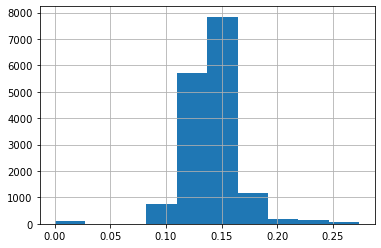

In [18]:
train['forecast_price_energy_p1'].hist()

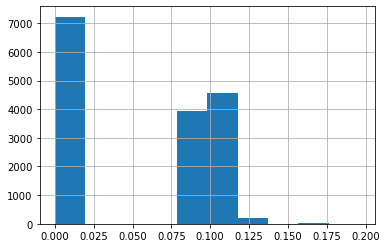

In [19]:
train['forecast_price_energy_p2'].hist()

In [20]:
#since less than 1 percent null values hence replacing them with median values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='median')

In [21]:
arr=imp.fit_transform(train[['forecast_discount_energy']])

train['forecast_discount_energy']=arr

In [22]:
train['forecast_price_energy_p1']=imp.fit_transform(train[['forecast_price_energy_p1']])
train['forecast_price_energy_p2']=imp.fit_transform(train[['forecast_price_energy_p2']])

In [23]:
train['forecast_price_pow_p1']=imp.fit_transform(train[['forecast_price_pow_p1']])

In [24]:
train['margin_gross_pow_ele']=imp.fit_transform(train[['margin_gross_pow_ele']])
train['margin_net_pow_ele']=imp.fit_transform(train[['margin_net_pow_ele']])

train['net_margin']=imp.fit_transform(train[['net_margin']])
train['num_years_antig']=imp.fit_transform(train[['num_years_antig']])

train['pow_max']=imp.fit_transform(train[['pow_max']])

In [25]:
train[['date_end','date_modif_prod','date_renewal','date_activ']]

,date_end,date_modif_prod,date_renewal,date_activ
0,2016-11-06,2012-11-07,2015-11-09,2012-11-07
1,2016-06-15,NaN,2015-06-23,2013-06-15
2,2016-08-30,2009-08-21,2015-08-31,2009-08-21
3,2016-04-16,2010-04-16,2015-04-17,2010-04-16
4,2016-03-30,2010-03-30,2015-03-31,2010-03-30
...,...,...,...,...
16091,2016-05-08,2015-05-08,2014-05-26,2012-05-24
16092,2016-08-27,2012-08-27,2015-08-28,2012-08-27
16093,2016-02-07,2012-02-08,2015-02-09,2012-02-08
16094,2016-08-30,2012-08-30,2015-08-31,2012-08-30


In [26]:

k1=train['date_modif_prod'].isna()
k2=train['date_modif_prod'].copy(deep=True)
k3=train['date_activ'].copy(deep=True)
for i in range(len(k1)):
    if k1[i]==True:
        k2[i]=k3[i]
train['date_modif_prod']=k2    

In [27]:
#concidering end of contract as next date of contract renewal
k1=train['date_renewal'].isna()
k2=train['date_renewal'].copy(deep=True)
k3=train['date_end'].copy(deep=True)
for i in range(len(k1)):
    if k1[i]==True:
        k2[i]=k3[i]
train['date_renewal']=k2  

In [28]:
train[train['date_renewal'].isna()==True][['date_end','date_modif_prod','date_renewal','date_activ']]

,date_end,date_modif_prod,date_renewal,date_activ
4452,NaN,2013-06-19,NaN,2013-06-19
12880,NaN,2015-05-24,NaN,2010-09-06


In [29]:
#dropping these 2 rows
train=train.dropna()

In [30]:
train.isna().sum()

id                          0
activity_new                0
channel_sales               0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
origin_up                   0
pow_max                     0
churn                       0
dtype: int64

#### Converting dates to date 

## -------------------------------------------------------------------------------------------------------------

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 16095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16094 non-null  object 
 1   activity_new              16094 non-null  object 
 2   channel_sales             16094 non-null  object 
 3   cons_12m                  16094 non-null  int64  
 4   cons_gas_12m              16094 non-null  int64  
 5   cons_last_month           16094 non-null  int64  
 6   date_activ                16094 non-null  object 
 7   date_end                  16094 non-null  object 
 8   date_modif_prod           16094 non-null  object 
 9   date_renewal              16094 non-null  object 
 10  forecast_cons_12m         16094 non-null  float64
 11  forecast_cons_year        16094 non-null  int64  
 12  forecast_discount_energy  16094 non-null  float64
 13  forecast_meter_rent_12m   16094 non-null  float64
 14  foreca

## -------------------------------------------------------------------------------------------------------------

In [32]:
len(train['activity_new'].unique())

420

In [33]:
len(train['channel_sales'].unique())

8

In [34]:
len(train['has_gas'].unique())

2

In [35]:
len(train['origin_up'].unique())

6

In [51]:
num=train.select_dtypes(include=np.number)
num.shape

(16094, 18)

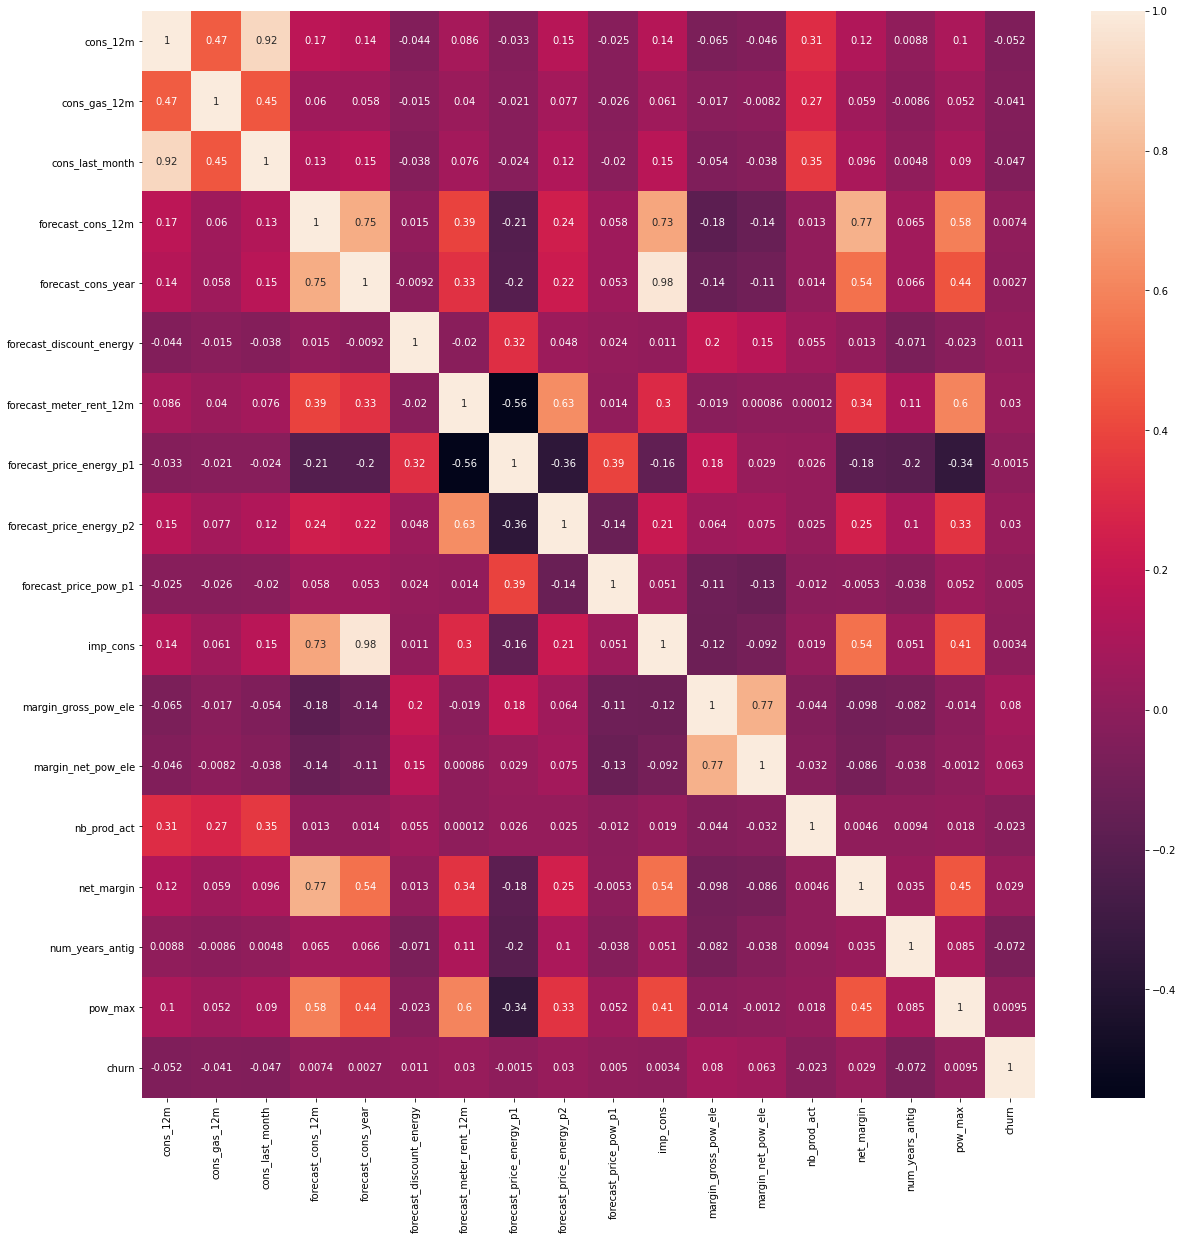

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(num.corr(),annot=True)

In [53]:
#forecast consumption year   consumption dropped as it shows high collinearity with other features
num=num.drop('forecast_cons_year',axis=1)

In [54]:
#forecast consumption 12m   consumption dropped as it shows high collinearity with other features
num=num.drop('forecast_cons_12m',axis=1)

In [55]:
agg_margin=(num['margin_gross_pow_ele']+num['margin_net_pow_ele'])/2
num['agg_margin']=agg_margin
num=num.drop('margin_gross_pow_ele',axis=1)
num=num.drop('margin_net_pow_ele',axis=1)

In [56]:
agg_margin=(num['cons_last_month']+num['cons_12m'])/2
num['agg_cons']=agg_margin
num=num.drop('cons_last_month',axis=1)
num=num.drop('cons_12m',axis=1)

In [57]:
agg_forcastprice_p1p2=(num['forecast_price_energy_p1']+num['forecast_price_energy_p2'])/2
num['agg_forcastprice_p1p2']=agg_margin
num=num.drop('forecast_price_energy_p1',axis=1)
num=num.drop('forecast_price_energy_p2',axis=1)

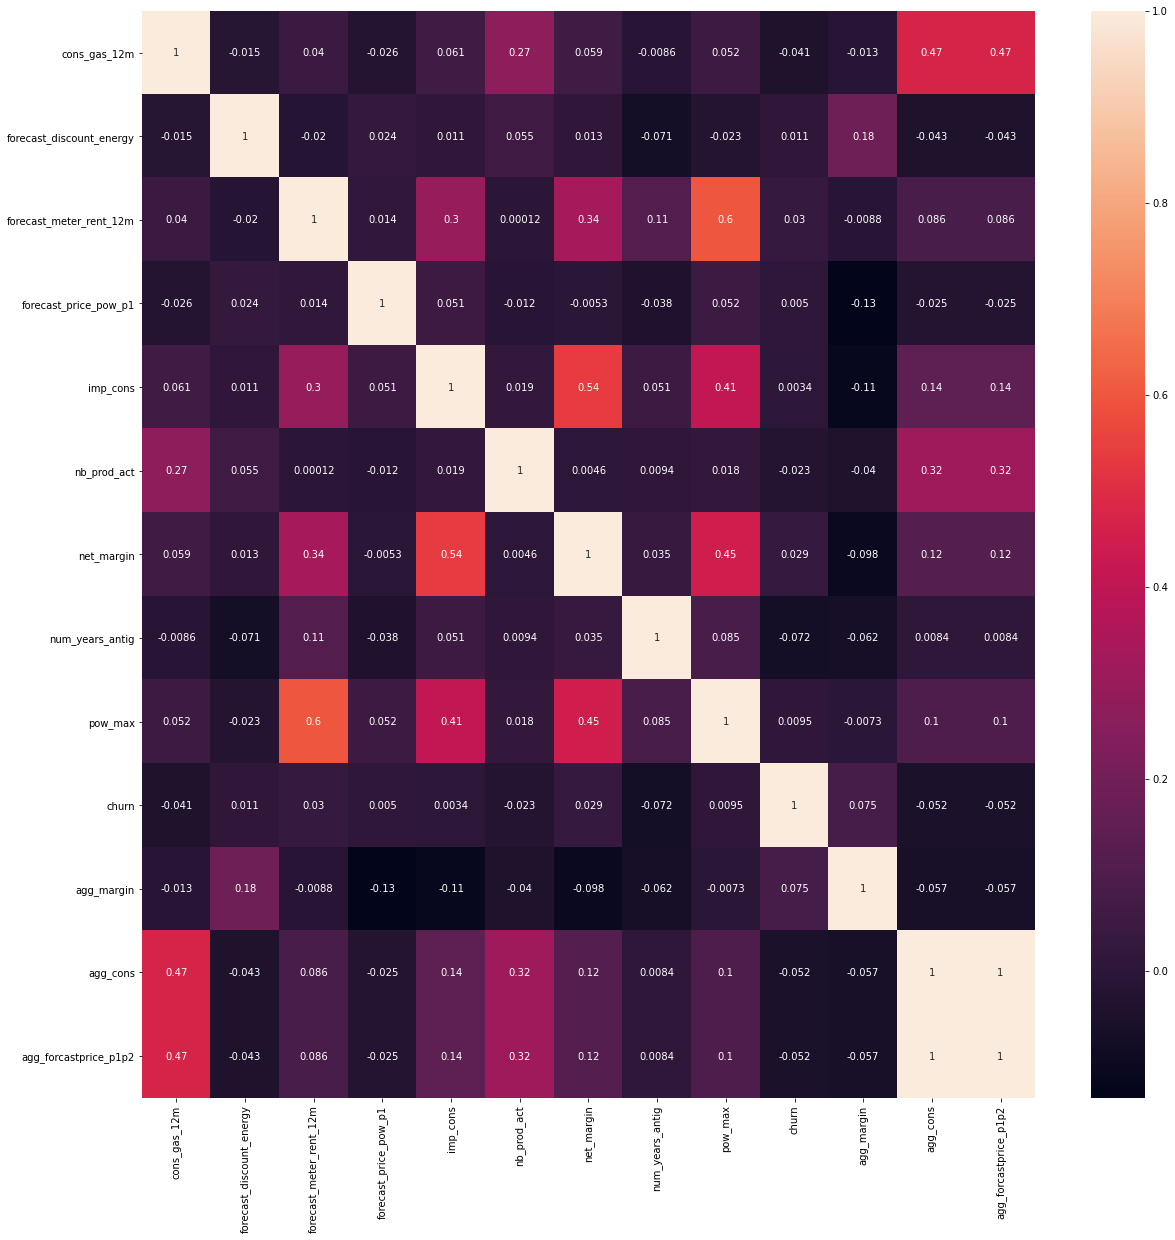

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(num.corr(),annot=True)

In [59]:
num.head()

,cons_gas_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_pow_p1,imp_cons,nb_prod_act,net_margin,num_years_antig,pow_max,churn,agg_margin,agg_cons,agg_forcastprice_p1p2
0,0,0.0,359.29,58.995952,831.8,1,1732.36,3.0,180.000,0,-41.76,159650.0,159650.0
1,54946,0.0,1.78,40.606701,0.0,2,678.99,3.0,43.648,1,25.44,0.0,0.0
2,0,0.0,16.27,44.311378,0.0,1,18.89,6.0,13.800,0,16.38,2330.0,2330.0
3,0,0.0,38.72,44.311378,0.0,1,6.60,6.0,13.856,0,28.60,272.0,272.0
4,0,0.0,19.83,44.311378,0.0,1,25.46,6.0,13.200,0,30.22,792.0,792.0


In [60]:
num=num.drop('agg_forcastprice_p1p2',axis=1)

In [61]:
num.skew()

cons_gas_12m                 9.525790
forecast_discount_energy     5.130034
forecast_meter_rent_12m      3.486151
forecast_price_pow_p1       -2.536003
imp_cons                     9.653702
nb_prod_act                 16.816298
net_margin                  21.327290
num_years_antig              1.441348
pow_max                      6.944724
churn                        2.683586
agg_margin                   0.036092
agg_cons                     6.403836
dtype: float64

In [62]:
np.cbrt(num).skew()

cons_gas_12m                 3.522402
forecast_discount_energy     5.007420
forecast_meter_rent_12m     -0.018111
forecast_price_pow_p1      -10.415388
imp_cons                     0.596558
nb_prod_act                  4.838434
net_margin                  -0.207957
num_years_antig              0.597997
pow_max                      2.726129
churn                        2.683586
agg_margin                  -2.190419
agg_cons                     2.518032
dtype: float64

In [63]:
np.log(num).skew()

cons_gas_12m                     NaN
forecast_discount_energy         NaN
forecast_meter_rent_12m          NaN
forecast_price_pow_p1            NaN
imp_cons                         NaN
nb_prod_act                 2.630396
net_margin                       NaN
num_years_antig             0.261430
pow_max                     1.779699
churn                            NaN
agg_margin                       NaN
agg_cons                         NaN
dtype: float64

In [64]:
num[['nb_prod_act','num_years_antig','pow_max']]=np.log(num[['nb_prod_act','num_years_antig','pow_max']])

In [68]:
num[['cons_gas_12m','imp_cons','net_margin','agg_cons',
     'forecast_meter_rent_12m',]]=np.cbrt(num[['cons_gas_12m','imp_cons','net_margin',
                                                                      'agg_cons','forecast_meter_rent_12m',
                                                                     ]])

In [69]:
cat=train.select_dtypes(include='object')
cat.shape

(16094, 9)

In [70]:
final=pd.concat([cat,num],axis=1)
final.shape

(16094, 21)

In [71]:
final.head()

,id,activity_new,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up,cons_gas_12m,...,forecast_meter_rent_12m,forecast_price_pow_p1,imp_cons,nb_prod_act,net_margin,num_years_antig,pow_max,churn,agg_margin,agg_cons
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,2012-11-07,2016-11-06,2012-11-07,2015-11-09,f,ldkssxwpmemidmecebumciepifcamkci,0.000000,...,7.109107,58.995952,9.404585,0.000000,12.010084,1.098612,5.192957,0,-41.76,54.248738
1,24011ae4ebbe3035111d65fa7c15bc57,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2013-06-15,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw,38.017075,...,1.211918,40.606701,0.000000,0.693147,8.789303,1.098612,3.776157,1,25.44,0.000000
2,d29c2c54acc38ff3c0614d0a653813dd,Unknown,Unknown,2009-08-21,2016-08-30,2009-08-21,2015-08-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.000000,...,2.533937,44.311378,0.000000,0.000000,2.663242,1.791759,2.624669,0,16.38,13.257205
3,764c75f661154dac3a6c254cd082ea7d,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.000000,...,3.383076,44.311378,0.000000,0.000000,1.875777,1.791759,2.628718,0,28.60,6.479224
4,bba03439a292a1e166f80264c16191cb,Unknown,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,2010-03-30,2015-03-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.000000,...,2.706705,44.311378,0.000000,0.000000,2.941843,1.791759,2.580217,0,30.22,9.252130


In [72]:
history_train.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [73]:
history_train.shape

(193002, 8)

In [74]:
history=history_train.groupby('id').mean().reset_index()
history.shape

(16096, 7)

In [75]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            16096 non-null  object 
 1   price_p1_var  16094 non-null  float64
 2   price_p2_var  16094 non-null  float64
 3   price_p3_var  16094 non-null  float64
 4   price_p1_fix  16094 non-null  float64
 5   price_p2_fix  16094 non-null  float64
 6   price_p3_fix  16094 non-null  float64
dtypes: float64(6), object(1)
memory usage: 880.4+ KB


In [76]:
history=history.dropna()
history.shape

(16094, 7)

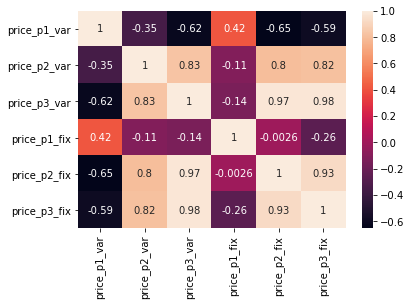

In [77]:
sns.heatmap(history.corr(),annot=True)

In [78]:
avg_price_p2_p3_var=(history['price_p3_fix']+history['price_p3_var'])/2
avg_price_p2_p3_fix=(history['price_p2_fix']+history['price_p3_fix'])/2
history=history.drop(['price_p2_fix','price_p3_fix', 'price_p3_fix' ,'price_p3_var'],axis=1)
history['avg_price_p2_p3_var']=avg_price_p2_p3_var
history['avg_price_p2_p3_fix']=avg_price_p2_p3_fix

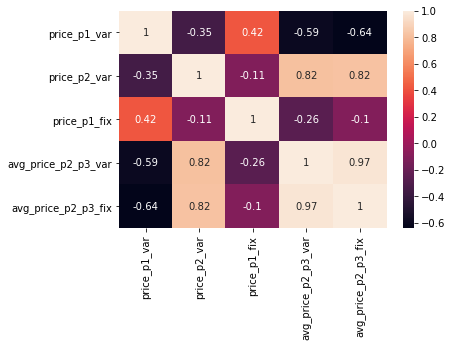

In [79]:
sns.heatmap(history.corr(),annot=True)

In [80]:
history=history.drop(['avg_price_p2_p3_var','avg_price_p2_p3_fix'],axis=1)

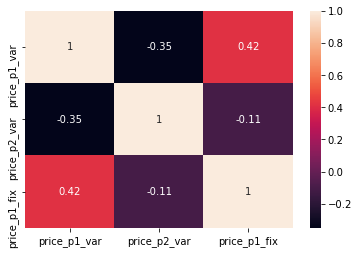

In [81]:
sns.heatmap(history.corr(),annot=True)

In [82]:
history.skew()

price_p1_var   -0.452455
price_p2_var   -0.130653
price_p1_fix   -2.812590
dtype: float64

In [83]:
train_final=pd.merge(final,history,on='id',how='inner')

In [84]:
train_final.shape

(16092, 24)

In [85]:
train_final['churn']=train_final['churn'].astype('object')

In [86]:
num=train_final.select_dtypes(include=np.number                             ).copy(deep=True)
num.shape

(16092, 14)

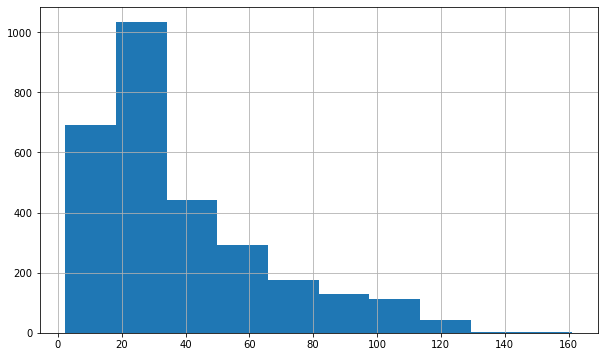

In [87]:
plt.rcParams['figure.figsize']=[10,6]
num[num['cons_gas_12m']>0]['cons_gas_12m'].hist()#approx2600 rows

(578,)


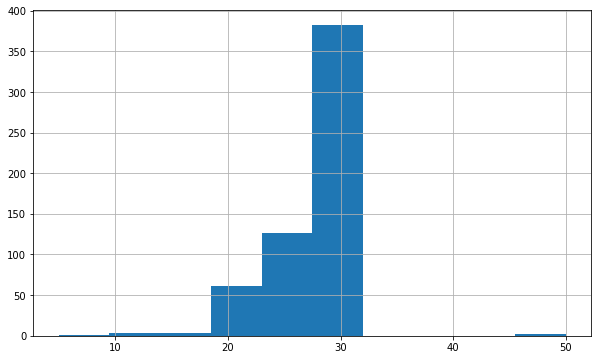

In [88]:
plt.rcParams['figure.figsize']=[10,6]
print(num[num['forecast_discount_energy']>0]['forecast_discount_energy'].shape)
num[num['forecast_discount_energy']>0]['forecast_discount_energy'].hist()#approx2600 rows

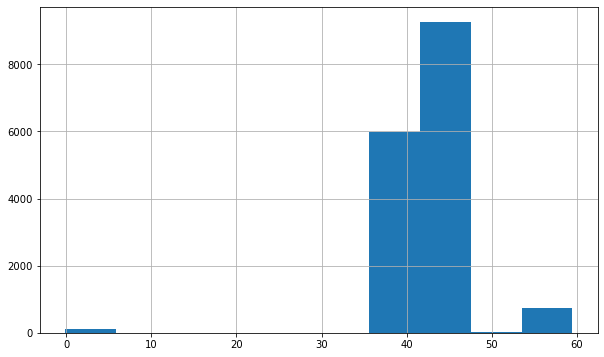

In [89]:
plt.rcParams['figure.figsize']=[10,6]
num['forecast_price_pow_p1'].hist()

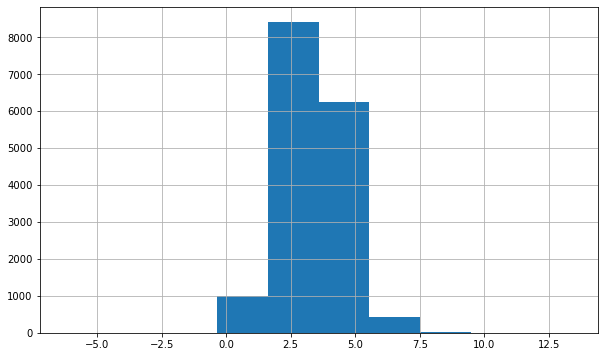

In [90]:
num['forecast_meter_rent_12m'].hist()

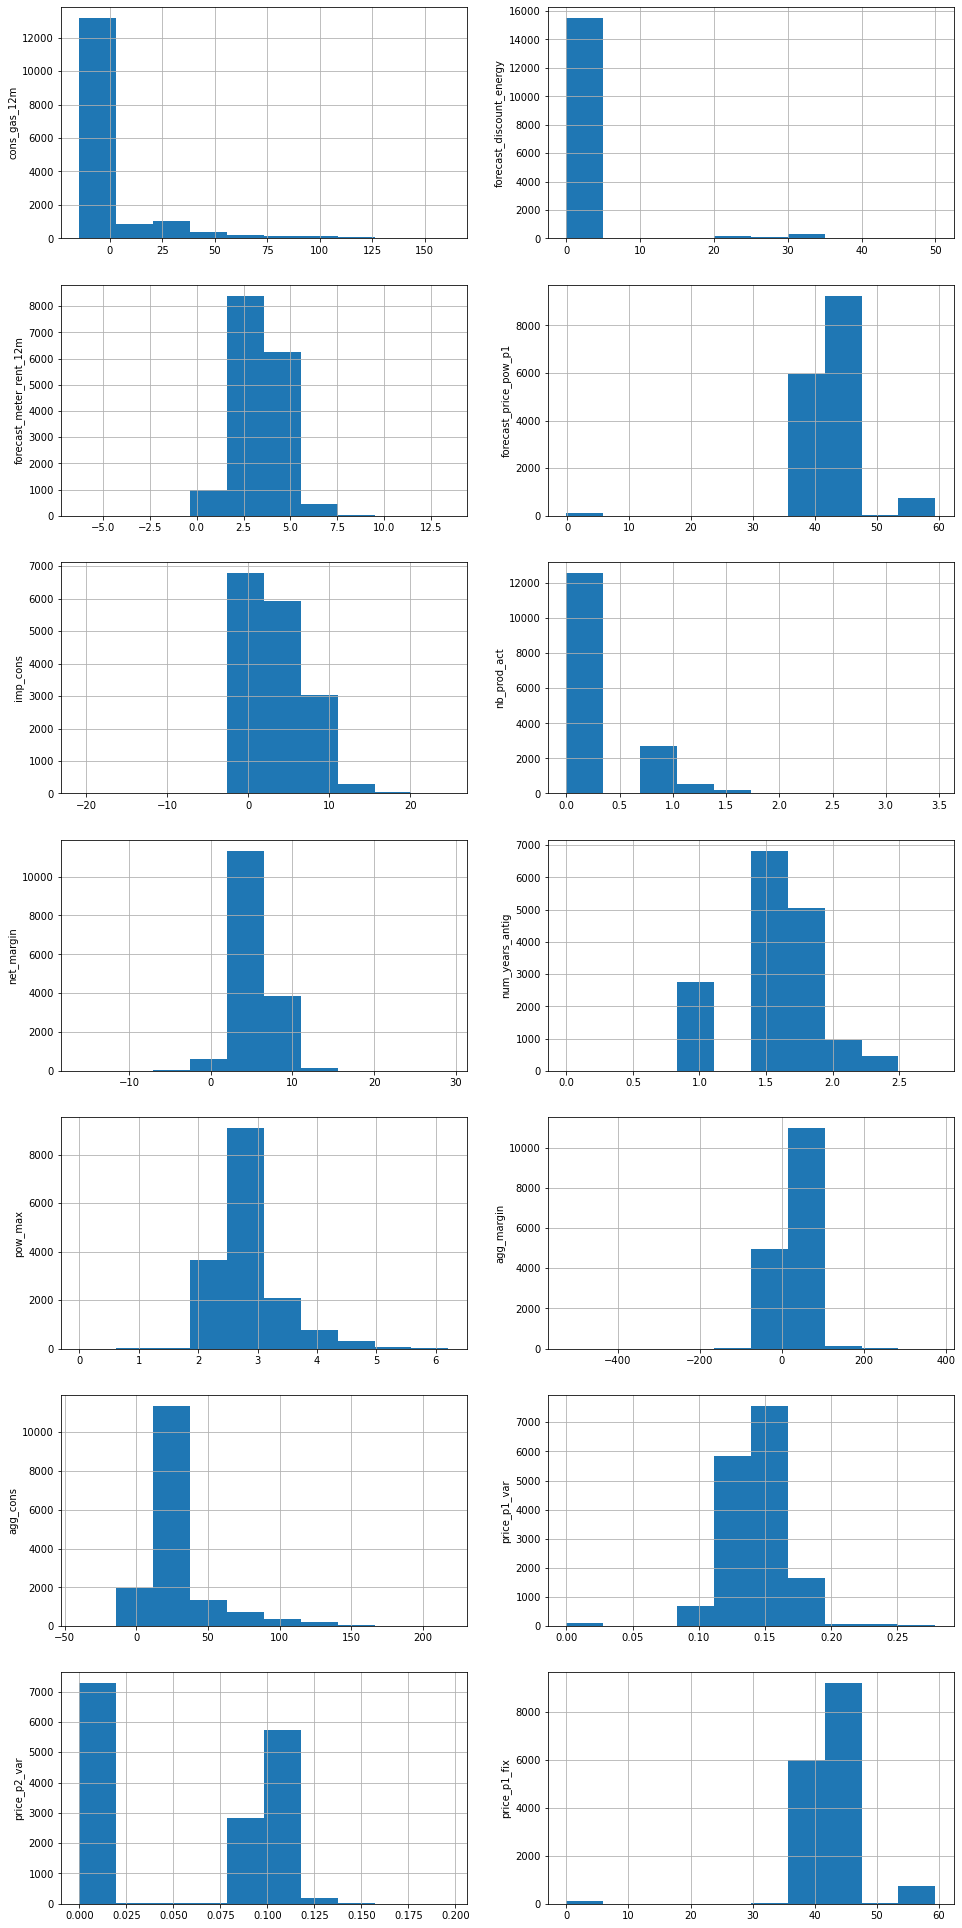

In [91]:
j=0
plt.rcParams['figure.figsize']=[16,40]
for i in num:
    j=j+1
    plt.subplot(8,2,j)
    num[i].hist()
    plt.ylabel(i)
    

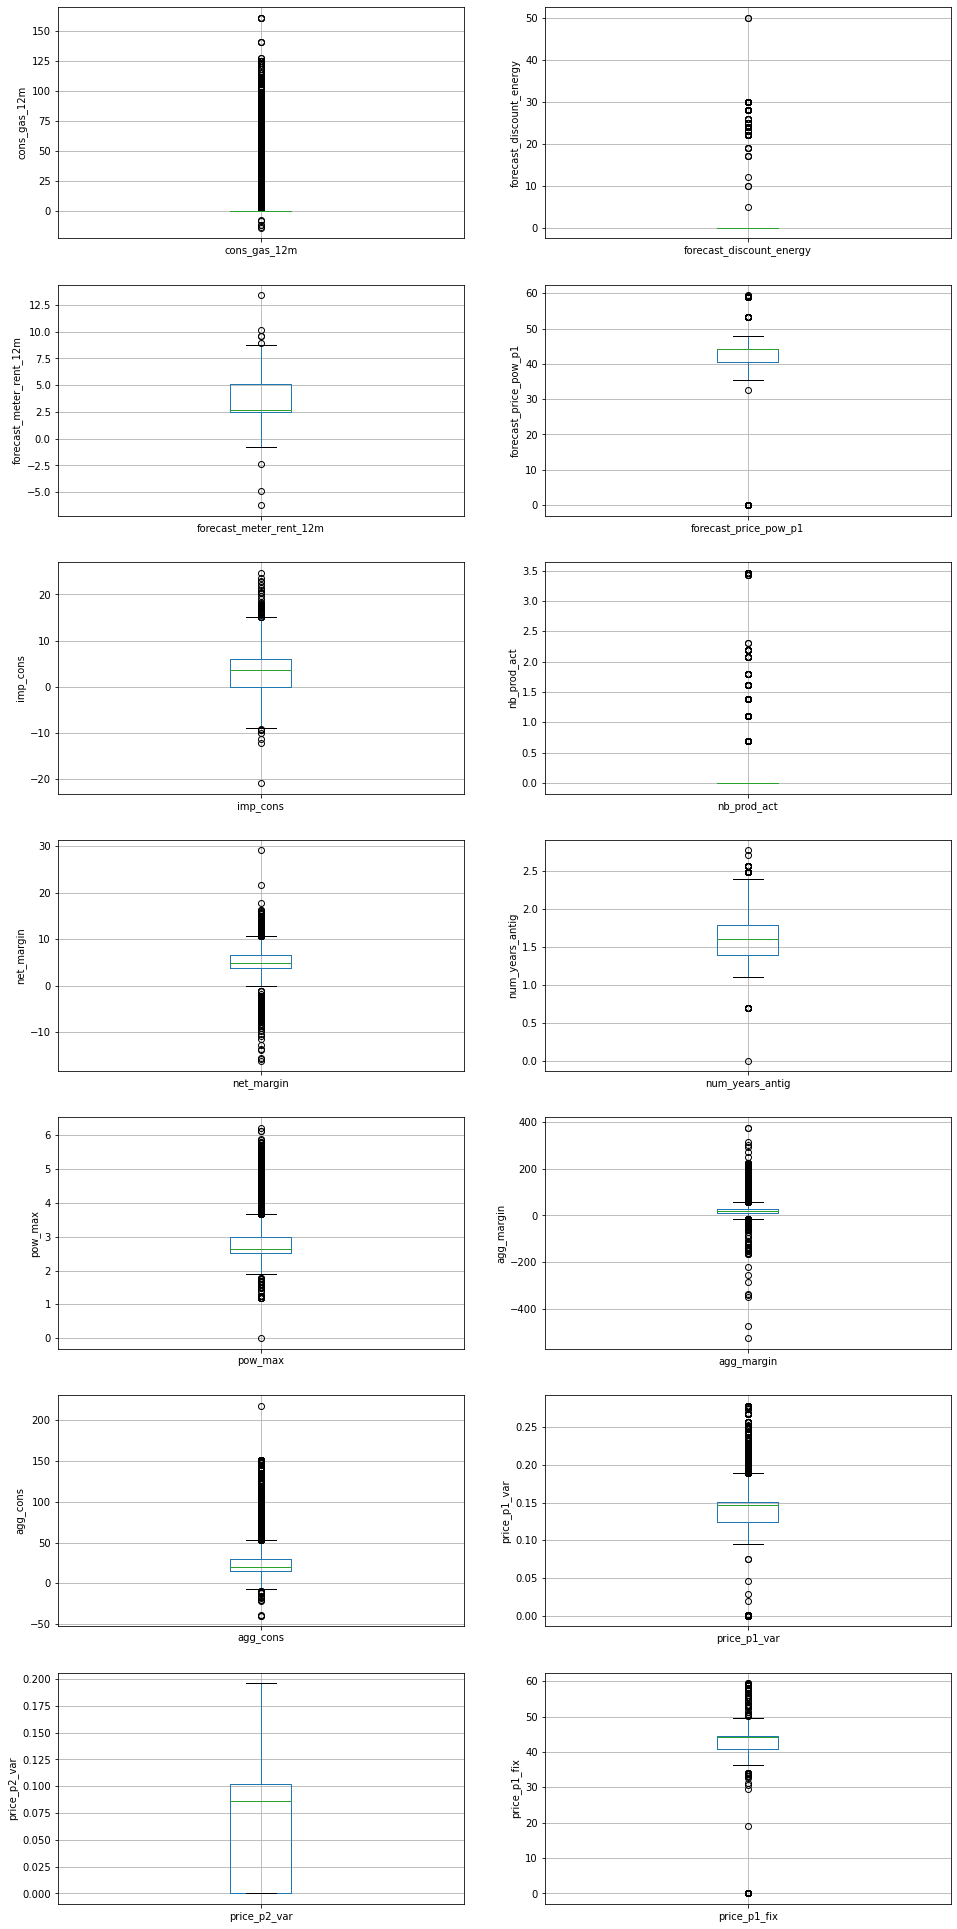

In [92]:
j=0
plt.rcParams['figure.figsize']=[16,40]
for i in num:
    j=j+1
    plt.subplot(8,2,j)
    num[[i]].boxplot()
    plt.ylabel(i)

In [93]:
num.columns

Index(['cons_gas_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_pow_p1', 'imp_cons', 'nb_prod_act', 'net_margin',
       'num_years_antig', 'pow_max', 'agg_margin', 'agg_cons', 'price_p1_var',
       'price_p2_var', 'price_p1_fix'],
      dtype='object')

In [94]:
# outliers are not removed from these columns
# as they has genuine values
#['cons_gas_12m', 'forecast_discount_energy', 'nb_prod_act',  'price_p2_var' ]

In [95]:
import scipy.stats as stats

In [96]:
for k in num:
    j=0
    z=pd.Series(stats.zscore(num[k]))
    m=num[k].mean()
    for i in range(num[k].shape[0]):
        if z[i]<-3 or z[i]>3:
            j=j+1
    print('feature ',k ,' has ', j ,' outliers ')

feature  cons_gas_12m  has  480  outliers 
feature  forecast_discount_energy  has  574  outliers 
feature  forecast_meter_rent_12m  has  23  outliers 
feature  forecast_price_pow_p1  has  240  outliers 
feature  imp_cons  has  88  outliers 
feature  nb_prod_act  has  267  outliers 
feature  net_margin  has  178  outliers 
feature  num_years_antig  has  16  outliers 
feature  pow_max  has  316  outliers 
feature  agg_margin  has  244  outliers 
feature  agg_cons  has  479  outliers 
feature  price_p1_var  has  277  outliers 
feature  price_p2_var  has  0  outliers 
feature  price_p1_fix  has  121  outliers 


In [97]:
for k in num.drop(['cons_gas_12m', 'forecast_discount_energy', 'nb_prod_act',  'price_p2_var' ],axis=1):
    j=0
    z=pd.Series(stats.zscore(num[k]))
    m=num[k].mean()
    for i in range(num[k].shape[0]):
        if z[i]<-3 or z[i]>3:
            num[k].iloc[i]=m

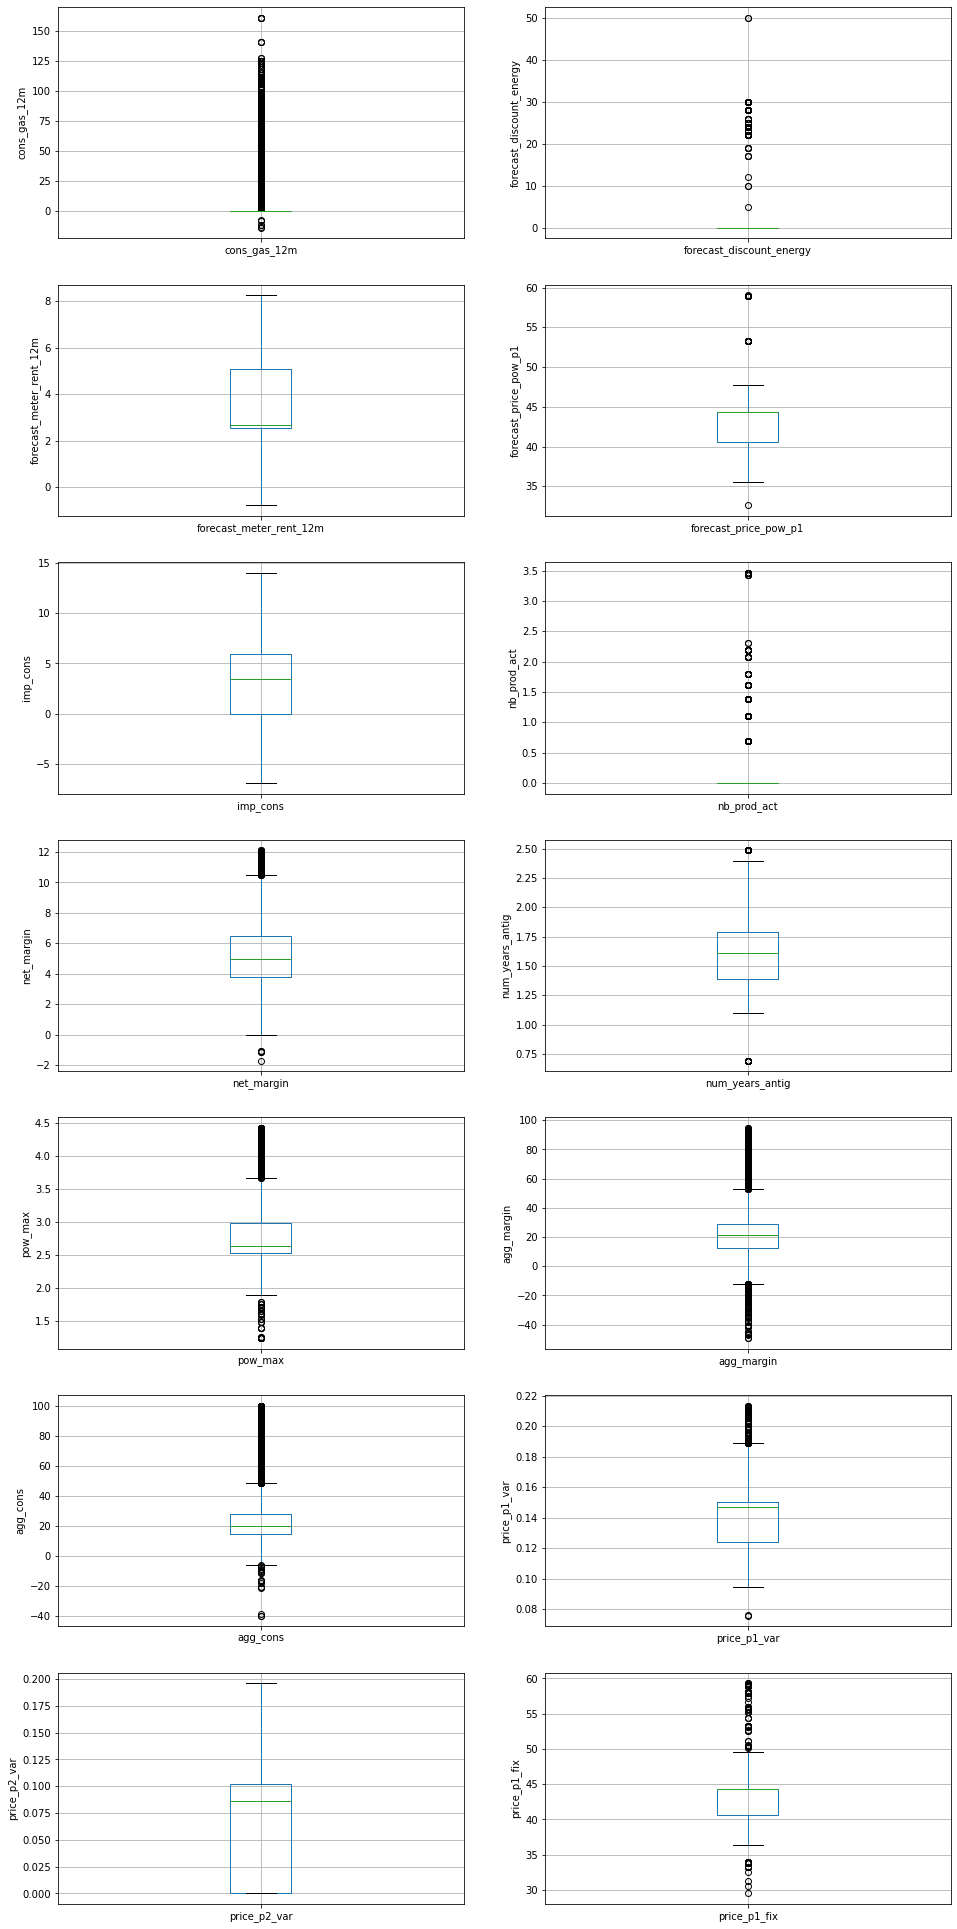

In [98]:
j=0
plt.rcParams['figure.figsize']=[16,40]
for i in num:
    j=j+1
    plt.subplot(8,2,j)
    num[[i]].boxplot()
    plt.ylabel(i)

In [99]:
cat=train_final.select_dtypes(include='object')
cat.head()

,id,activity_new,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,2012-11-07,2016-11-06,2012-11-07,2015-11-09,f,ldkssxwpmemidmecebumciepifcamkci,0
1,24011ae4ebbe3035111d65fa7c15bc57,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2013-06-15,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw,1
2,d29c2c54acc38ff3c0614d0a653813dd,Unknown,Unknown,2009-08-21,2016-08-30,2009-08-21,2015-08-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0
3,764c75f661154dac3a6c254cd082ea7d,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0
4,bba03439a292a1e166f80264c16191cb,Unknown,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,2010-03-30,2015-03-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0


In [100]:
cat.columns

Index(['id', 'activity_new', 'channel_sales', 'date_activ', 'date_end',
       'date_modif_prod', 'date_renewal', 'has_gas', 'origin_up', 'churn'],
      dtype='object')

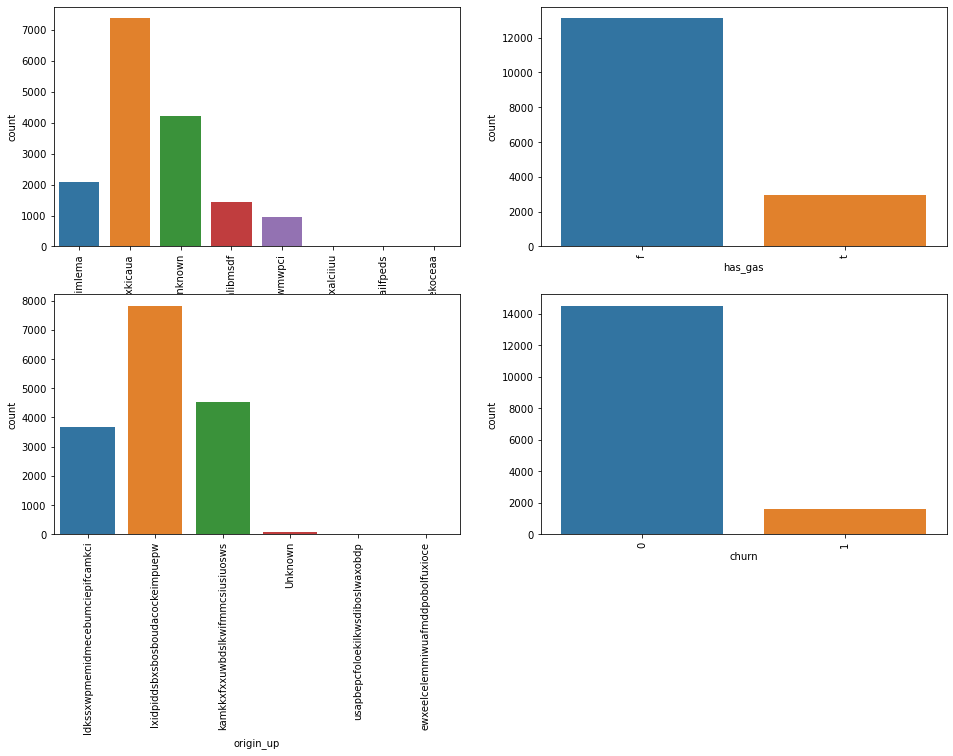

In [101]:
j=0
plt.rcParams['figure.figsize']=[16,15]
for i in cat.drop(['id','activity_new','date_activ','date_end','date_modif_prod','date_renewal'],axis=1):
    j=j+1
    plt.subplot(3,2,j)
    sns.countplot(cat[i])
    plt.xticks(rotation='vertical')

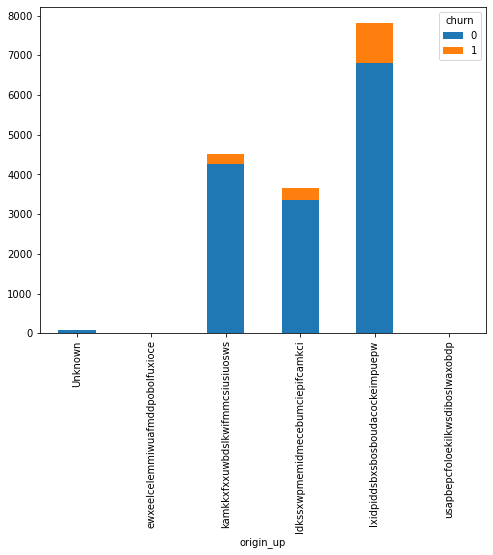

In [102]:
plt.rcParams['figure.figsize']=[8,6]
pd.crosstab(cat['origin_up'],cat['churn']).plot(kind='bar',stacked=True)

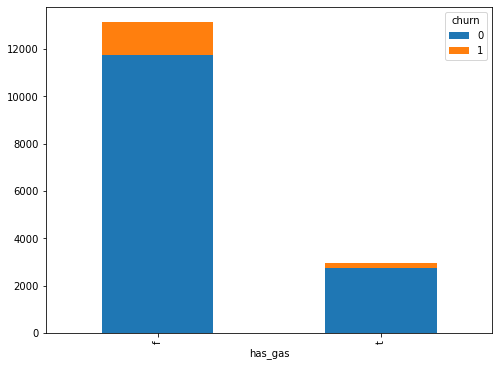

In [103]:
plt.rcParams['figure.figsize']=[8,6]
pd.crosstab(cat['has_gas'],cat['churn']).plot(kind='bar',stacked=True)

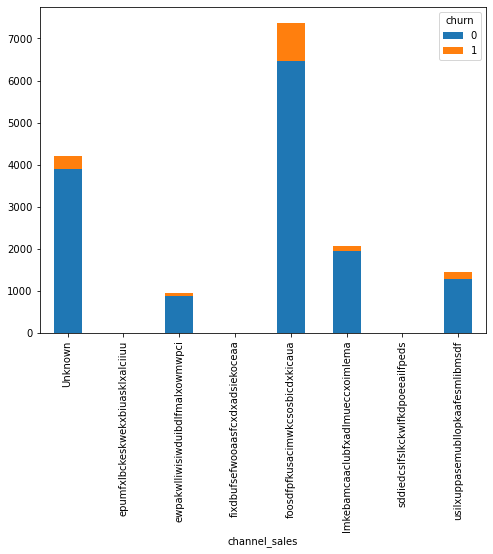

In [104]:
plt.rcParams['figure.figsize']=[8,6]
pd.crosstab(cat['channel_sales'],cat['churn']).plot(kind='bar',stacked=True)

In [105]:
train_final.head()

,id,activity_new,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up,cons_gas_12m,...,nb_prod_act,net_margin,num_years_antig,pow_max,churn,agg_margin,agg_cons,price_p1_var,price_p2_var,price_p1_fix
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,2012-11-07,2016-11-06,2012-11-07,2015-11-09,f,ldkssxwpmemidmecebumciepifcamkci,0.000000,...,0.000000,12.010084,1.098612,5.192957,0,-41.76,54.248738,0.103449,0.092115,58.956502
1,24011ae4ebbe3035111d65fa7c15bc57,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2013-06-15,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw,38.017075,...,0.693147,8.789303,1.098612,3.776157,1,25.44,0.000000,0.122856,0.102137,40.640023
2,d29c2c54acc38ff3c0614d0a653813dd,Unknown,Unknown,2009-08-21,2016-08-30,2009-08-21,2015-08-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.000000,...,0.000000,2.663242,1.791759,2.624669,0,16.38,13.257205,0.149934,0.000000,44.315416
3,764c75f661154dac3a6c254cd082ea7d,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.000000,...,0.000000,1.875777,1.791759,2.628718,0,28.60,6.479224,0.170512,0.088421,44.385450
4,bba03439a292a1e166f80264c16191cb,Unknown,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,2010-03-30,2015-03-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.000000,...,0.000000,2.941843,1.791759,2.580217,0,30.22,9.252130,0.151210,0.000000,44.400265


In [106]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16092 entries, 0 to 16091
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16092 non-null  object 
 1   activity_new              16092 non-null  object 
 2   channel_sales             16092 non-null  object 
 3   date_activ                16092 non-null  object 
 4   date_end                  16092 non-null  object 
 5   date_modif_prod           16092 non-null  object 
 6   date_renewal              16092 non-null  object 
 7   has_gas                   16092 non-null  object 
 8   origin_up                 16092 non-null  object 
 9   cons_gas_12m              16092 non-null  float64
 10  forecast_discount_energy  16092 non-null  float64
 11  forecast_meter_rent_12m   16092 non-null  float64
 12  forecast_price_pow_p1     16092 non-null  float64
 13  imp_cons                  16092 non-null  float64
 14  nb_pro

In [107]:
train_final.to_csv('train_final.csv')